This notebook was used to generate graph of findings fo analysis. Used the matplotlib library for graph generation.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('finalData.csv')

In [18]:
df

,INPATIENT_DATA_ID_x,DEPARTMENT_ID,DEPARTMENT_NAME,VISIT_TYPE,APPT_LENGTH,APPT_STATUS_NAME,CONTACT_DATE,APPT_DTTM,CHECKIN_DTTM,CHECKOUT_DTTM,...,INFUSION_END,CHAIR_OUT,ORDER_DESCRIPTION,ORDER_STATUS,CHAIR,Unnamed: 19,WAIT_ONE,WAIT_TWO,TOTAL_WAIT,TIME_OF_DAY
0,APTT001,DEPT001,INFUSION Department,INFUSION 30 MIN,30,Arrived,10/31/21,2021-10-31 14:00:00,13:28:00,NaN,...,NaN,NaN,NaN,*Unspecified Order Status,Chair 1,NaN,12.0,NaN,NaN,Afternoon (12:00 PM - 4:00PM)
1,APTT002,DEPT001,INFUSION Department,INFUSION 2 HR,150,Arrived,10/31/21,2021-10-31 12:00:00,12:21:00,NaN,...,NaN,NaN,NaN,*Unspecified Order Status,Chair 2,NaN,54.0,NaN,NaN,Morning (9:00AM - 12:00PM)
2,APTT003,DEPT001,INFUSION Department,INFUSION 4 HR,270,Arrived,10/31/21,2021-10-31 13:00:00,12:52:00,NaN,...,3:20 PM,NaN,ARSENIC TRIOXIDE IN D5W/NS 250 ML IVPB,Completed [5],Chair 2,NaN,23.0,0.0,23.0,Afternoon (12:00 PM - 4:00PM)
3,APTT004,DEPT001,INFUSION Department,INFUSION 1 HR,90,Completed,10/31/21,2021-10-31 09:00:00,08:50:00,2021-10-31 12:41PM,...,11:55 AM,NaN,PEMBROLIZUMAB 200 MG IN NS 59 ML,Completed [5],Chair 3,NaN,30.0,115.0,145.0,Early Morning (6:00AM - 9:00AM)
4,APTT007,DEPT001,INFUSION Department,INFUSION 2 HR,120,Completed,10/31/21,2021-10-31 10:30:00,10:19:00,2021-10-31 02:09PM,...,NaN,NaN,NaN,*Unspecified Order Status,Chair 3,NaN,11.0,NaN,NaN,Morning (9:00AM - 12:00PM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,APTT418,DEPT001,INFUSION Department,INFUSION 30 MIN,30,Arrived,11/4/21,2021-11-04 14:00:00,14:06:00,NaN,...,NaN,NaN,NaN,11/4,*Unspecified Order Status,Chair 18,44.0,NaN,NaN,Afternoon (12:00 PM - 4:00PM)
269,APTT419,DEPT001,INFUSION Department,INFUSION 2 HR,150,Arrived,11/4/21,2021-11-04 13:30:00,14:12:00,NaN,...,5:00 PM,NaN,GEMCITABINE (AS 1 G/26.3 ML) IN NS INFUSION,11/4,Completed [5],Chair 9,18.0,75.0,93.0,Afternoon (12:00 PM - 4:00PM)
270,APTT420,DEPT001,INFUSION Department,INFUSION 2 HR,150,Completed,11/4/21,2021-11-04 15:30:00,14:17:00,2021-11-04 03:53PM,...,3:40 PM,NaN,VINCRISTINE IN NS INFUSION,11/4,Completed [5],Chair 10,23.0,80.0,103.0,Afternoon (12:00 PM - 4:00PM)
271,APTT422,DEPT001,INFUSION Department,INFUSION 5 HR,30,Arrived,11/4/21,2021-11-04 12:00:00,16:13:00,NaN,...,5:30 PM,NaN,SODIUM CHLORIDE 0.9 % BOLUS,11/4,Completed [5],Chair 18,17.0,15.0,32.0,Morning (9:00AM - 12:00PM)


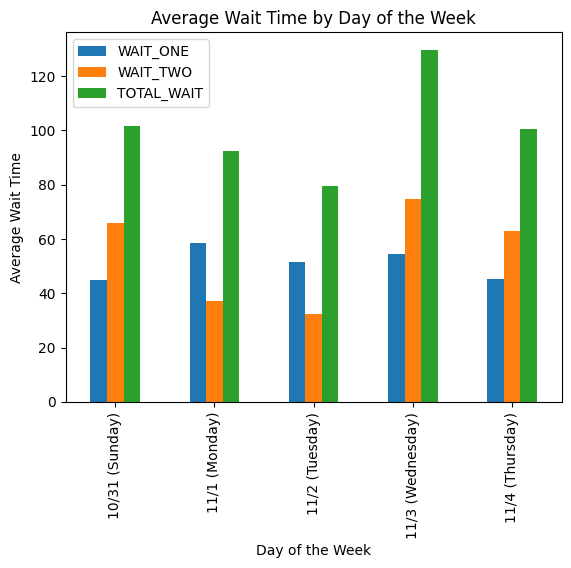

In [19]:
grouped = df.groupby('CONTACT_DATE').mean(numeric_only=True)

dates = df['CONTACT_DATE'].unique()

ax = grouped.iloc[:, -3:].plot(kind='bar')

labels = ['10/31 (Sunday)', '11/1 (Monday)', '11/2 (Tuesday)', '11/3 (Wednesday)', '11/4 (Thursday)']
ax.set_xticklabels(labels)

plt.xlabel('Day of the Week')
plt.ylabel('Average Wait Time')
plt.title('Average Wait Time by Day of the Week')

plt.show()

Text(0.5, 1.0, 'Average Wait Time by Time of Day')

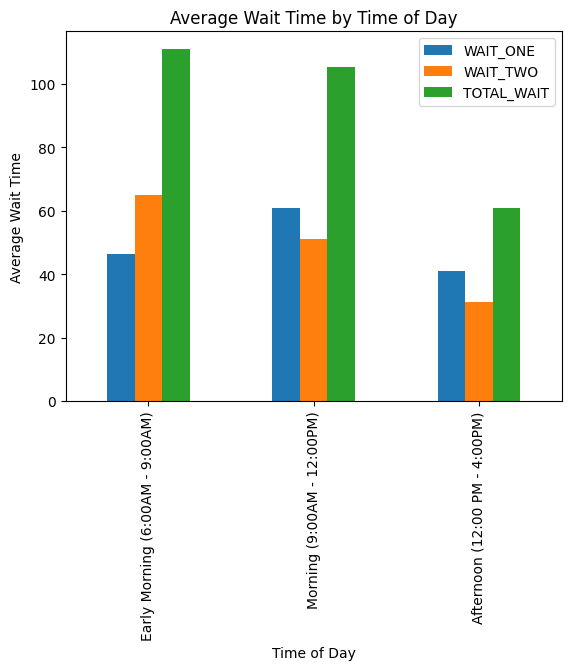

In [20]:
grouped = df.groupby('TIME_OF_DAY').mean(numeric_only=True)

order = ['Early Morning (6:00AM - 9:00AM)', 'Morning (9:00AM - 12:00PM)', 'Afternoon (12:00 PM - 4:00PM)']

grouped = grouped.reindex(order)

dates = df['TIME_OF_DAY'].unique()

ax = grouped.iloc[:, -3:].plot(kind='bar')

plt.xlabel('Time of Day')
plt.ylabel('Average Wait Time')
plt.title('Average Wait Time by Time of Day')